## Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head(10)

,store,city,discount_amount,discount,month_01,month_02,month_03,month_04,month_05,month_06,...,state_UT,state_VA,state_WY,brand_cluster_Cluster_2,brand_cluster_Cluster_3,brand_cluster_Cluster_4,brand_cluster_Cluster_5,brand_cluster_Cluster_6,log_retail,log_cost
0,2309,FARMINGTON,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.386294,1.791759
1,4802,PANAMA CITY,0.500000,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,2.564949,2.995732
2,1702,LAKE WALES,0.588088,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2.890372,3.465736
3,407,FT. WORTH,0.350000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.465736,3.178054
4,7303,CANTON,0.681591,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.931826,3.258097
5,2907,BROWNSVILLE,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2.995732,2.484907
6,1203,COLUMBIA,0.849500,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,3.044522,2.302585
7,7102,MONTGOMERY,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,3.178054,2.708050
8,9304,OKLAHOMA CITY,1.000000,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,2.197225,1.609438
9,4807,LONGVIEW,0.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2.833213,2.639057


In [4]:
data.dtypes

store                        int64
city                        object
discount_amount            float64
discount                     int64
month_01                     int64
                            ...   
brand_cluster_Cluster_4      int64
brand_cluster_Cluster_5      int64
brand_cluster_Cluster_6      int64
log_retail                 float64
log_cost                   float64
Length: 374, dtype: object

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
store,2000000.0,4441.892040,2838.757646,102.0,2109.000000,4103.000000,7102.000000,9909.000000
discount_amount,1969454.0,inf,NaN,0.0,0.500000,1.000000,1.000000,inf
discount,2000000.0,0.471315,0.499177,0.0,0.000000,0.000000,1.000000,1.000000
month_01,2000000.0,0.056021,0.229962,0.0,0.000000,0.000000,0.000000,1.000000
month_02,2000000.0,0.098549,0.298056,0.0,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
brand_cluster_Cluster_4,2000000.0,0.261371,0.439381,0.0,0.000000,0.000000,1.000000,1.000000
brand_cluster_Cluster_5,2000000.0,0.428737,0.494896,0.0,0.000000,0.000000,1.000000,1.000000
brand_cluster_Cluster_6,2000000.0,0.150344,0.357408,0.0,0.000000,0.000000,0.000000,1.000000
log_retail,2000000.0,2.726324,0.864819,0.0,2.197225,2.772589,3.258097,7.219642


## Proportion of Null Values for each Column

In [6]:
np.round(data.isnull().mean() * 100, 1)

store                      0.0
city                       0.0
discount_amount            1.5
discount                   0.0
month_01                   0.0
                          ... 
brand_cluster_Cluster_4    0.0
brand_cluster_Cluster_5    0.0
brand_cluster_Cluster_6    0.0
log_retail                 0.0
log_cost                   0.0
Length: 374, dtype: float64

## Histogram of Discount Amount

In [7]:
filter_discount = data[data["discount_amount"] < 1]
filter_discount.replace([np.inf, - np.inf, ], np.nan, inplace = True)
filter_discount = filter_discount.dropna()

/var/folders/69/mkmscpkx3ng5r4r5thym29b00000gn/T/ipykernel_12563/4098733152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_discount.replace([np.inf, - np.inf, ], np.nan, inplace = True)


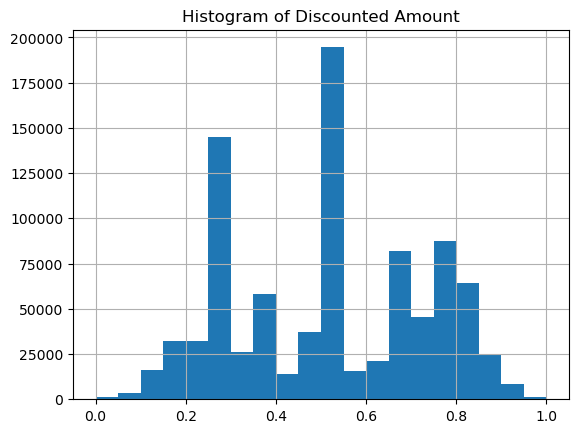

In [24]:
filter_discount["discount_amount"].hist(bins = 20)
plt.title('Histogram of Discounted Amount')
plt.savefig("Histogram of Discount Amount.jpg")

## Correlation Matrix among Discount, Log_Retail, and Log_Cost

In [9]:
corrr = data[["discount","log_retail", "log_cost"]]

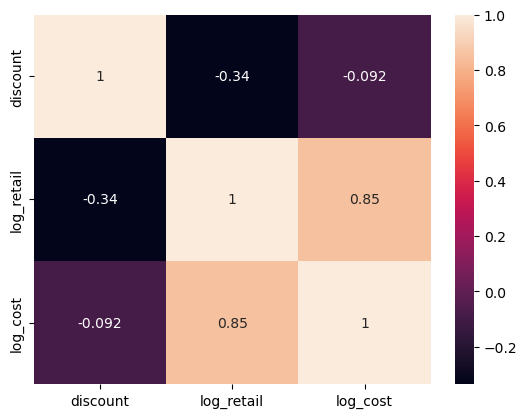

In [25]:
sns.heatmap(corrr.corr(), annot=True)
plt.savefig("corr.jpg")

## Proportion of Discount and Full Price Items

In [27]:
Discount = data[data["discount"] == 1].shape[0]/data.shape[0]
Full_Price = data[data["discount"] == 0].shape[0]/data.shape[0]

In [29]:
Discount

0.4713155

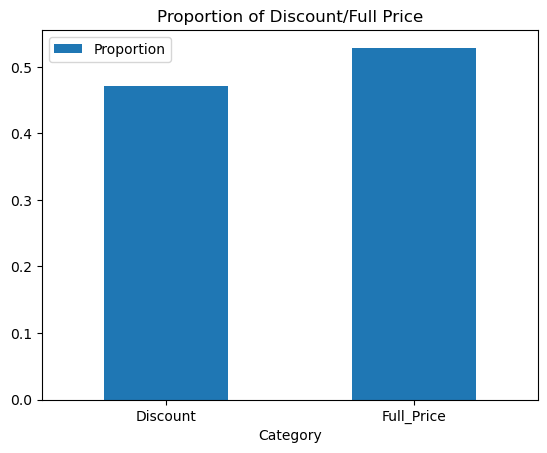

In [28]:
df = pd.DataFrame({'Category':['Discount', 'Full_Price'], 'Proportion':[Discount, Full_Price]})
ax = df.plot.bar(x='Category', y='Proportion', rot=0, title = "Proportion of Discount/Full Price")
plt.savefig("discount_full.jpg")

## Discounted Porportion by State

In [13]:
temp = pd.DataFrame(data.columns)
temp = temp.set_axis(['name'], axis=1, inplace=False)
temp = pd.DataFrame(temp.iloc[338:367, 0])

In [14]:
temp['name'] = temp['name'].str.slice(6, 8)

In [15]:
by_state = data.pivot_table(
    index = [ 'state_AL   ','state_AR   ','state_AZ   ','state_CA   ',
             'state_CO   ','state_FL   ','state_GA   ','state_IA   ',
             'state_ID   ','state_IL   ','state_IN   ','state_KS   ',
             'state_KY   ','state_LA   ','state_MO   ','state_MS   ',
             'state_MT   ','state_NC   ','state_NE   ','state_NM   ',
             'state_NV   ','state_OH   ','state_OK   ','state_SC   ',
             'state_TN   ','state_TX   ','state_UT   ','state_VA   ','state_WY   '],
    values = ["discount"],
    aggfunc= "mean"
)

In [16]:
def invertList(input_list): 
    input_list.reverse()
    return input_list

In [31]:
import plotly
import plotly.express as px

fig = px.choropleth(locations =  invertList(list(temp["name"])), 
                    locationmode="USA-states", color= by_state["discount"], scope="usa", title = "Discount by State")

fig.show()

<Figure size 640x480 with 0 Axes>

## Discounted Porportion by Zipcode

In [18]:
by_zip = data.pivot_table(
    index = [ 'zip_23060','zip_23233','zip_23235','zip_23320','zip_23321','zip_23452','zip_23510',
             'zip_23602','zip_23834','zip_27103','zip_27203','zip_27262','zip_27407','zip_27511',
             'zip_27514','zip_27616','zip_28054','zip_28134','zip_28211','zip_28212','zip_28403',
             'zip_28602','zip_28805','zip_28806','zip_29212','zip_29223','zip_29301','zip_29406',
             'zip_29407','zip_29577','zip_29607','zip_29803','zip_30022','zip_30038','zip_30135',
             'zip_30346','zip_30519','zip_30909','zip_31206','zip_31419','zip_31707','zip_31909',
             'zip_32073','zip_32114','zip_32225','zip_32246','zip_32256','zip_32301','zip_32303',
             'zip_32405','zip_32504','zip_32569','zip_32605','zip_32701','zip_32765','zip_32771',
             'zip_32803','zip_32809','zip_32904','zip_32952','zip_32966','zip_33026','zip_33071',
             'zip_33172','zip_33304','zip_33388','zip_33401','zip_33414','zip_33426','zip_33511',
             'zip_33607','zip_33612','zip_33625','zip_33710','zip_33761','zip_33809','zip_33859',
             'zip_33901','zip_33948','zip_34102','zip_34205','zip_34238','zip_34239','zip_34668',
             'zip_34761','zip_34957','zip_35405','zip_35601','zip_35630','zip_35801','zip_35806',
             'zip_36117','zip_36203','zip_36303','zip_36527','zip_36606','zip_36830','zip_37013',
             'zip_37040','zip_37067','zip_37072','zip_37129','zip_37215','zip_37221','zip_37388',
             'zip_37421','zip_37919','zip_37924','zip_38115','zip_38117','zip_38133','zip_39157',
             'zip_39180','zip_39301','zip_39402','zip_39531','zip_40207','zip_40216','zip_40219',
             'zip_40502','zip_40503','zip_40504','zip_41017','zip_42001','zip_42104','zip_43614',
             'zip_43623','zip_44004','zip_44035','zip_44060','zip_44070','zip_44122','zip_44136',
             'zip_44333','zip_44446','zip_44512','zip_44718','zip_45005','zip_45211','zip_45236',
             'zip_45245','zip_45246','zip_45251','zip_47129','zip_47374','zip_50266','zip_50702',
             'zip_51503','zip_52241','zip_52806','zip_59102','zip_59601','zip_59801','zip_61265',
             'zip_62208','zip_62959','zip_63017','zip_63034','zip_63074','zip_63117','zip_63126',
             'zip_63129','zip_63376','zip_64057','zip_64114','zip_64155','zip_64506','zip_65109',
             'zip_65203','zip_65804','zip_66205','zip_66214','zip_66502','zip_66604','zip_67207',
             'zip_67209','zip_67401','zip_67501','zip_68114','zip_68144','zip_68505','zip_68803',
             'zip_70002','zip_70053','zip_70065','zip_70127','zip_70364','zip_70403','zip_70460',
             'zip_70503','zip_70601','zip_70815','zip_70836','zip_71104','zip_71111','zip_71203',
             'zip_71301','zip_71601','zip_71913','zip_72103','zip_72116','zip_72205','zip_72401',
             'zip_72703','zip_72903','zip_73072','zip_73110','zip_73118','zip_73134','zip_73149',
             'zip_73501','zip_73703','zip_74006','zip_74133','zip_74135','zip_74401','zip_74804',
             'zip_75062','zip_75067','zip_75075','zip_75081','zip_75090','zip_75093','zip_75150',
             'zip_75225','zip_75237','zip_75240','zip_75503','zip_75605','zip_75703','zip_76015',
             'zip_76053','zip_76116','zip_76132','zip_76205','zip_76308','zip_76502','zip_76543',
             'zip_76710','zip_76904','zip_77024','zip_77056','zip_77070','zip_77082','zip_77338',
             'zip_77380','zip_77479','zip_77506','zip_77546','zip_77566','zip_77591','zip_77642',
             'zip_77706','zip_77840','zip_77904','zip_78041','zip_78205','zip_78216','zip_78238',
             'zip_78247','zip_78411','zip_78501','zip_78526','zip_78552','zip_78613','zip_78746',
             'zip_78752','zip_79121','zip_79414','zip_79606','zip_79705','zip_79762','zip_79912',
             'zip_79925','zip_80012','zip_80021','zip_80030','zip_80122','zip_80123','zip_80124',
             'zip_80501','zip_80631','zip_80909','zip_80920','zip_81008','zip_82009','zip_83202',
             'zip_83404','zip_83704','zip_84070','zip_84107','zip_84341','zip_84405','zip_84601',
             'zip_84790','zip_85032','zip_85033','zip_85051','zip_85202','zip_85206','zip_85226',
             'zip_85251','zip_85308','zip_85365','zip_85635','zip_85705','zip_85711','zip_86004',
             'zip_86303','zip_87110','zip_87114','zip_87402','zip_87505','zip_88011','zip_88101',
             'zip_89014','zip_89107','zip_89109','zip_89119','zip_92243','zip_93551','zip_95207',],
    values = ["discount"],
    aggfunc= "mean"
)

In [19]:
by_zip[by_zip["discount"] == by_zip["discount"].min()]

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,discount
zip_23060,zip_23233,zip_23235,zip_23320,zip_23321,zip_23452,zip_23510,zip_23602,zip_23834,zip_27103,zip_27203,zip_27262,zip_27407,zip_27511,zip_27514,zip_27616,zip_28054,zip_28134,zip_28211,zip_28212,zip_28403,zip_28602,zip_28805,zip_28806,zip_29212,zip_29223,zip_29301,zip_29406,zip_29407,zip_29577,zip_29607,zip_29803,zip_30022,zip_30038,zip_30135,zip_30346,zip_30519,zip_30909,zip_31206,zip_31419,zip_31707,zip_31909,zip_32073,zip_32114,zip_32225,zip_32246,zip_32256,zip_32301,zip_32303,zip_32405,zip_32504,zip_32569,zip_32605,zip_32701,zip_32765,zip_32771,zip_32803,zip_32809,zip_32904,zip_32952,zip_32966,zip_33026,zip_33071,zip_33172,zip_33304,zip_33388,zip_33401,zip_33414,zip_33426,zip_33511,zip_33607,zip_33612,zip_33625,zip_33710,zip_33761,zip_33809,zip_33859,zip_33901,zip_33948,zip_34102,zip_34205,zip_34238,zip_34239,zip_34668,zip_34761,zip_34957,zip_35405,zip_35601,zip_35630,zip_35801,zip_35806,zip_36117,zip_36203,zip_36303,zip_36527,zip_36606,zip_36830,zip_37013,zip_37040,zip_37067,zip_37072,zip_37129,zip_37215,zip_37221,zip_37388,zip_37421,zip_37919,zip_37924,zip_38115,zip_38117,zip_38133,zip_39157,zip_39180,zip_39301,zip_39402,zip_39531,zip_40207,zip_40216,zip_40219,zip_40502,zip_40503,zip_40504,zip_41017,zip_42001,zip_42104,zip_43614,zip_43623,zip_44004,zip_44035,zip_44060,zip_44070,zip_44122,zip_44136,zip_44333,zip_44446,zip_44512,zip_44718,zip_45005,zip_45211,zip_45236,zip_45245,zip_45246,zip_45251,zip_47129,zip_47374,zip_50266,zip_50702,zip_51503,zip_52241,zip_52806,zip_59102,zip_59601,zip_59801,zip_61265,zip_62208,zip_62959,zip_63017,zip_63034,zip_63074,zip_63117,zip_63126,zip_63129,zip_63376,zip_64057,zip_64114,zip_64155,zip_64506,zip_65109,zip_65203,zip_65804,zip_66205,zip_66214,zip_66502,zip_66604,zip_67207,zip_67209,zip_67401,zip_67501,zip_68114,zip_68144,zip_68505,zip_68803,zip_70002,zip_70053,zip_70065,zip_70127,zip_70364,zip_70403,zip_70460,zip_70503,zip_70601,zip_70815,zip_70836,zip_71104,zip_71111,zip_71203,zip_71301,zip_71601,zip_71913,zip_72103,zip_72116,zip_72205,zip_72401,zip_72703,zip_72903,zip_73072,zip_73110,zip_73118,zip_73134,zip_73149,zip_73501,zip_73703,zip_74006,zip_74133,zip_74135,zip_74401,zip_74804,zip_75062,zip_75067,zip_75075,zip_75081,zip_75090,zip_75093,zip_75150,zip_75225,zip_75237,zip_75240,zip_75503,zip_75605,zip_75703,zip_76015,zip_76053,zip_76116,zip_76132,zip_76205,zip_76308,zip_76502,zip_76543,zip_76710,zip_76904,zip_77024,zip_77056,zip_77070,zip_77082,zip_77338,zip_77380,zip_77479,zip_77506,zip_77546,zip_77566,zip_77591,zip_77642,zip_77706,zip_77840,zip_77904,zip_78041,zip_78205,zip_78216,zip_78238,zip_78247,zip_78411,zip_78501,zip_78526,zip_78552,zip_78613,zip_78746,zip_78752,zip_79121,zip_79414,zip_79606,zip_79705,zip_79762,zip_79912,zip_79925,zip_80012,zip_80021,zip_80030,zip_80122,zip_80123,zip_80124,zip_80501,zip_80631,zip_80909,zip_80920,zip_81008,zip_82009,zip_83202,zip_83404,zip_83704,zip_84070,zip_84107,zip_84341,zip_84405,zip_84601,zip_84790,zip_85032,zip_85033,zip_85051,zip_85202,zip_85206,zip_85226,zip_85251,zip_85308,zip_85365,zip_85635,zip_85705,zip_85711,zip_86004,zip_86303,zip_87110,zip_87114,zip_87402,zip_87505,zip_88011,zip_88101,zip_89014,zip_89107,zip_89109,zip_89119,zip_92243,zip_93551,zip_95207,
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [20]:
by_zip[by_zip["discount"] == by_zip["discount"].max()]

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,discount
zip_23060,zip_23233,zip_23235,zip_23320,zip_23321,zip_23452,zip_23510,zip_23602,zip_23834,zip_27103,zip_27203,zip_27262,zip_27407,zip_27511,zip_27514,zip_27616,zip_28054,zip_28134,zip_28211,zip_28212,zip_28403,zip_28602,zip_28805,zip_28806,zip_29212,zip_29223,zip_29301,zip_29406,zip_29407,zip_29577,zip_29607,zip_29803,zip_30022,zip_30038,zip_30135,zip_30346,zip_30519,zip_30909,zip_31206,zip_31419,zip_31707,zip_31909,zip_32073,zip_32114,zip_32225,zip_32246,zip_32256,zip_32301,zip_32303,zip_32405,zip_32504,zip_32569,zip_32605,zip_32701,zip_32765,zip_32771,zip_32803,zip_32809,zip_32904,zip_32952,zip_32966,zip_33026,zip_33071,zip_33172,zip_33304,zip_33388,zip_33401,zip_33414,zip_33426,zip_33511,zip_33607,zip_33612,zip_33625,zip_33710,zip_33761,zip_33809,zip_33859,zip_33901,zip_33948,zip_34102,zip_34205,zip_34238,zip_34239,zip_34668,zip_34761,zip_34957,zip_35405,zip_35601,zip_35630,zip_35801,zip_35806,zip_36117,zip_36203,zip_36303,zip_36527,zip_36606,zip_36830,zip_37013,zip_37040,zip_37067,zip_37072,zip_37129,zip_37215,zip_37221,zip_37388,zip_37421,zip_37919,zip_37924,zip_38115,zip_38117,zip_38133,zip_39157,zip_39180,zip_39301,zip_39402,zip_39531,zip_40207,zip_40216,zip_40219,zip_40502,zip_40503,zip_40504,zip_41017,zip_42001,zip_42104,zip_43614,zip_43623,zip_44004,zip_44035,zip_44060,zip_44070,zip_44122,zip_44136,zip_44333,zip_44446,zip_44512,zip_44718,zip_45005,zip_45211,zip_45236,zip_45245,zip_45246,zip_45251,zip_47129,zip_47374,zip_50266,zip_50702,zip_51503,zip_52241,zip_52806,zip_59102,zip_59601,zip_59801,zip_61265,zip_62208,zip_62959,zip_63017,zip_63034,zip_63074,zip_63117,zip_63126,zip_63129,zip_63376,zip_64057,zip_64114,zip_64155,zip_64506,zip_65109,zip_65203,zip_65804,zip_66205,zip_66214,zip_66502,zip_66604,zip_67207,zip_67209,zip_67401,zip_67501,zip_68114,zip_68144,zip_68505,zip_68803,zip_70002,zip_70053,zip_70065,zip_70127,zip_70364,zip_70403,zip_70460,zip_70503,zip_70601,zip_70815,zip_70836,zip_71104,zip_71111,zip_71203,zip_71301,zip_71601,zip_71913,zip_72103,zip_72116,zip_72205,zip_72401,zip_72703,zip_72903,zip_73072,zip_73110,zip_73118,zip_73134,zip_73149,zip_73501,zip_73703,zip_74006,zip_74133,zip_74135,zip_74401,zip_74804,zip_75062,zip_75067,zip_75075,zip_75081,zip_75090,zip_75093,zip_75150,zip_75225,zip_75237,zip_75240,zip_75503,zip_75605,zip_75703,zip_76015,zip_76053,zip_76116,zip_76132,zip_76205,zip_76308,zip_76502,zip_76543,zip_76710,zip_76904,zip_77024,zip_77056,zip_77070,zip_77082,zip_77338,zip_77380,zip_77479,zip_77506,zip_77546,zip_77566,zip_77591,zip_77642,zip_77706,zip_77840,zip_77904,zip_78041,zip_78205,zip_78216,zip_78238,zip_78247,zip_78411,zip_78501,zip_78526,zip_78552,zip_78613,zip_78746,zip_78752,zip_79121,zip_79414,zip_79606,zip_79705,zip_79762,zip_79912,zip_79925,zip_80012,zip_80021,zip_80030,zip_80122,zip_80123,zip_80124,zip_80501,zip_80631,zip_80909,zip_80920,zip_81008,zip_82009,zip_83202,zip_83404,zip_83704,zip_84070,zip_84107,zip_84341,zip_84405,zip_84601,zip_84790,zip_85032,zip_85033,zip_85051,zip_85202,zip_85206,zip_85226,zip_85251,zip_85308,zip_85365,zip_85635,zip_85705,zip_85711,zip_86004,zip_86303,zip_87110,zip_87114,zip_87402,zip_87505,zip_88011,zip_88101,zip_89014,zip_89107,zip_89109,zip_89119,zip_92243,zip_93551,zip_95207,
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Discounted Porportion by brand clustering

In [21]:
by_brand = data.pivot_table(
    index = [ 'brand_cluster_Cluster_2','brand_cluster_Cluster_3',
             'brand_cluster_Cluster_4','brand_cluster_Cluster_5','brand_cluster_Cluster_6'],
    values = ["discount"],
    aggfunc= "mean"
)

In [22]:
by_brand

discount
brand_cluster_Cluster_2 brand_cluster_Cluster_3 brand_cluster_Cluster_4 brand_cluster_Cluster_5 brand_cluster_Cluster_6          
0                       0                       0                       0                       1                        0.605694
                                                                        1                       0                        0.346002
                                                1                       0                       0                        0.540078
                        1                       0                       0                       0                        0.568793
1                       0                       0                       0                       0                        0.411765